In [80]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 
import plotly.express as px
import sklearn 
from pandas import Series, DataFrame 
from sklearn.linear_model import LinearRegression
from sklearn import linear_model 
import statsmodels.api as sm     
from statsmodels.stats.outliers_influence import variance_inflation_factor
import warnings 
warnings.filterwarnings('ignore')

In [81]:
df = pd.read_csv('churn_clean.csv',dtype={'locationid':np.int64}) 

df.head(5)

CaseOrder Customer_id                           Interaction  \
0          1     K409198  aa90260b-4141-4a24-8e36-b04ce1f4f77b   
1          2     S120509  fb76459f-c047-4a9d-8af9-e0f7d4ac2524   
2          3     K191035  344d114c-3736-4be5-98f7-c72c281e2d35   
3          4      D90850  abfa2b40-2d43-4994-b15a-989b8c79e311   
4          5     K662701  68a861fd-0d20-4e51-a587-8a90407ee574   

                                UID         City State                 County  \
0  e885b299883d4f9fb18e39c75155d990  Point Baker    AK  Prince of Wales-Hyder   
1  f2de8bef964785f41a2959829830fb8a  West Branch    MI                 Ogemaw   
2  f1784cfa9f6d92ae816197eb175d3c71      Yamhill    OR                Yamhill   
3  dc8a365077241bb5cd5ccd305136b05e      Del Mar    CA              San Diego   
4  aabb64a116e83fdc4befc1fbab1663f9    Needville    TX              Fort Bend   

     Zip       Lat        Lng  ...  MonthlyCharge Bandwidth_GB_Year Item1  \
0  99927  56.25100 -133.37571  ...     172.455519        904.536110     5   
1  48661  44.32893  -84.24080  ...     242.632554        800.982766     3   
2  97148  45.35589 -123.24657  ...     159.947583       2054.706961     4   
3  92014  32.96687 -117.24798  ...     119.956840       2164.579412     4   
4  77461  29.38012  -95.80673  ...     149.948316        271.493436     4   

  Item2  Item3  Item4  Item5 Item6 Item7 Item8  
0     5      5      3      4     4     3     4  
1     4      3      3      4     3     4     4  
2     4      2      4      4     3     3     3  
3     4      4      2      5     4     3     3  
4     4      4      3      4     4     4     5  

[5 rows x 50 columns]

In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 50 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   CaseOrder             10000 non-null  int64  
 1   Customer_id           10000 non-null  object 
 2   Interaction           10000 non-null  object 
 3   UID                   10000 non-null  object 
 4   City                  10000 non-null  object 
 5   State                 10000 non-null  object 
 6   County                10000 non-null  object 
 7   Zip                   10000 non-null  int64  
 8   Lat                   10000 non-null  float64
 9   Lng                   10000 non-null  float64
 10  Population            10000 non-null  int64  
 11  Area                  10000 non-null  object 
 12  TimeZone              10000 non-null  object 
 13  Job                   10000 non-null  object 
 14  Children              10000 non-null  int64  
 15  Age                 

### Data Cleaning

In [83]:
print(df.duplicated().value_counts())

False    10000
dtype: int64


In [84]:
df.isnull().sum()

CaseOrder               0
Customer_id             0
Interaction             0
UID                     0
City                    0
State                   0
County                  0
Zip                     0
Lat                     0
Lng                     0
Population              0
Area                    0
TimeZone                0
Job                     0
Children                0
Age                     0
Income                  0
Marital                 0
Gender                  0
Churn                   0
Outage_sec_perweek      0
Email                   0
Contacts                0
Yearly_equip_failure    0
Techie                  0
Contract                0
Port_modem              0
Tablet                  0
InternetService         0
Phone                   0
Multiple                0
OnlineSecurity          0
OnlineBackup            0
DeviceProtection        0
TechSupport             0
StreamingTV             0
StreamingMovies         0
PaperlessBilling        0
PaymentMetho

In [85]:
CheckOutliers = ['Children', 'Age', 'Income', 'Outage_sec_perweek','Email', 'Contacts', 'Yearly_equip_failure', 'Tenure', 'MonthlyCharge', 'Bandwidth_GB_Year']
CheckOutliers

['Children',
 'Age',
 'Income',
 'Outage_sec_perweek',
 'Email',
 'Contacts',
 'Yearly_equip_failure',
 'Tenure',
 'MonthlyCharge',
 'Bandwidth_GB_Year']

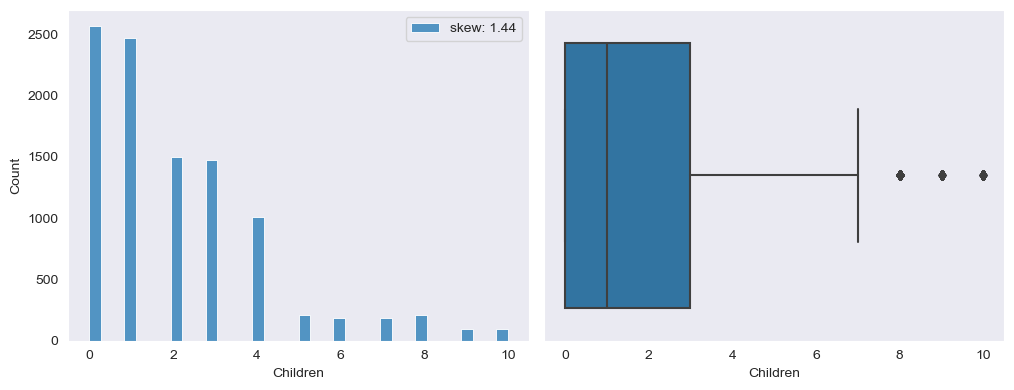

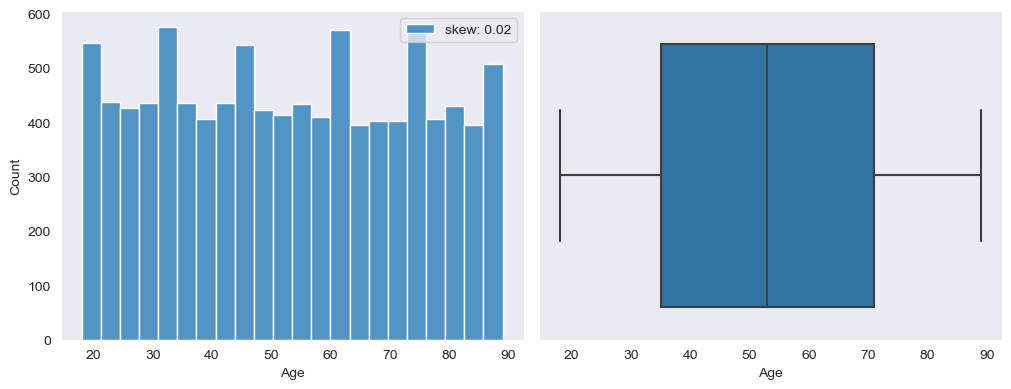

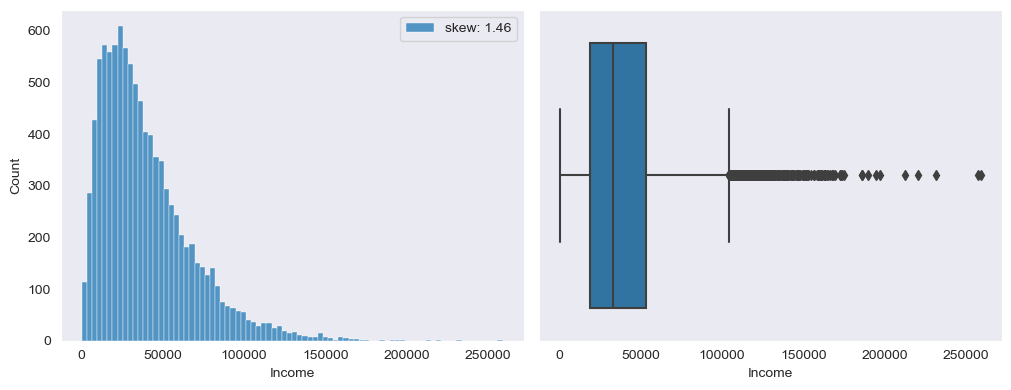

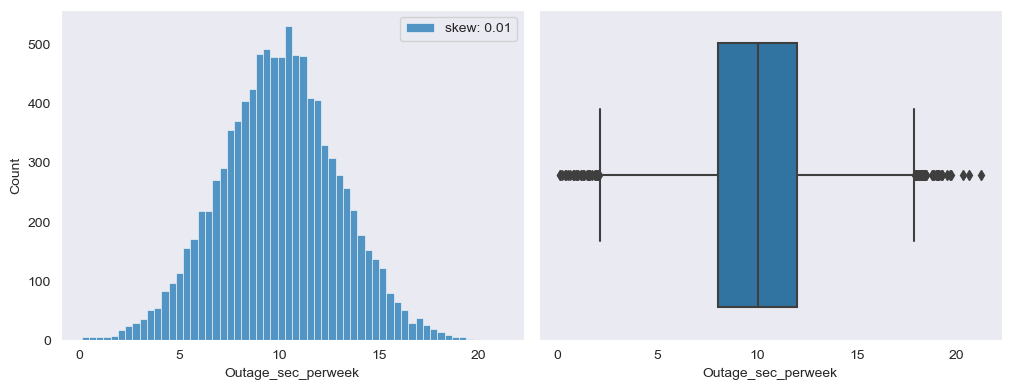

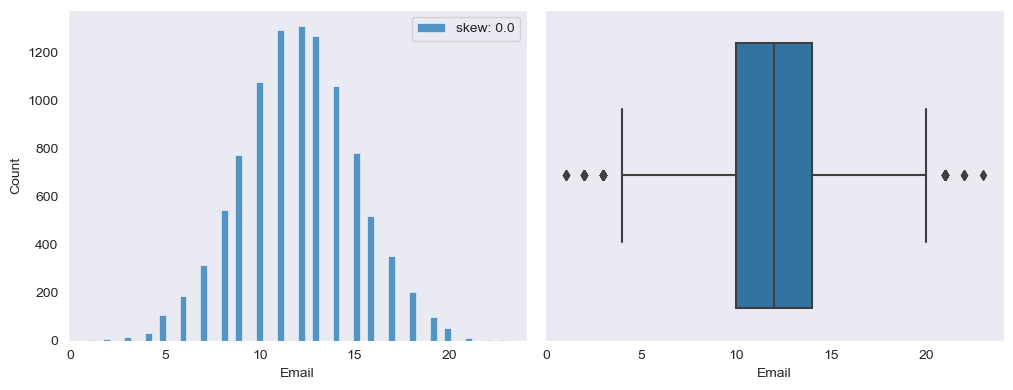

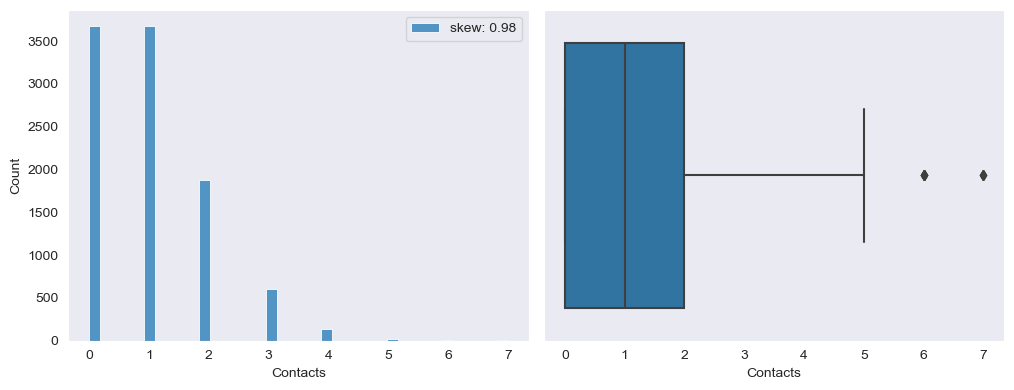

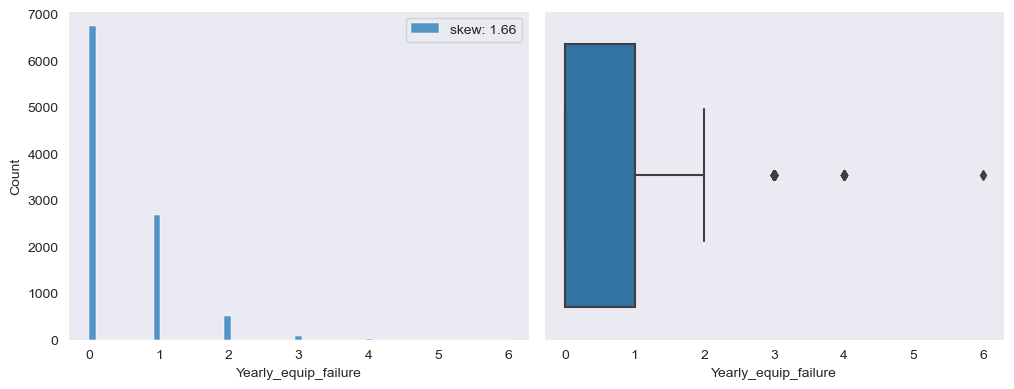

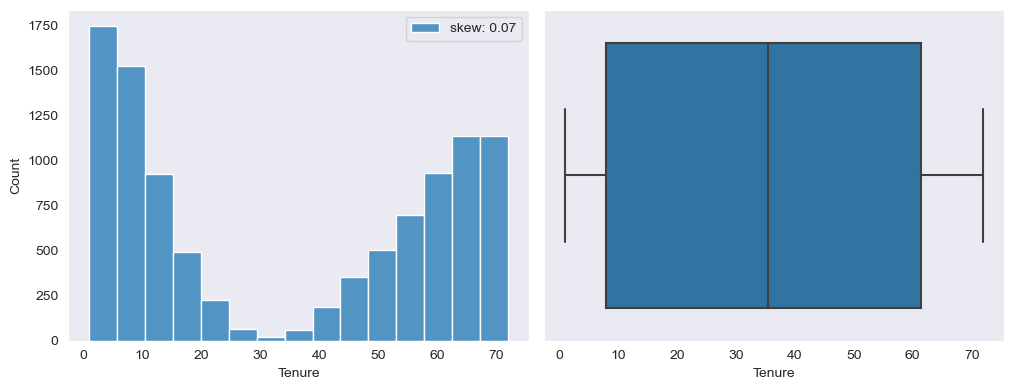

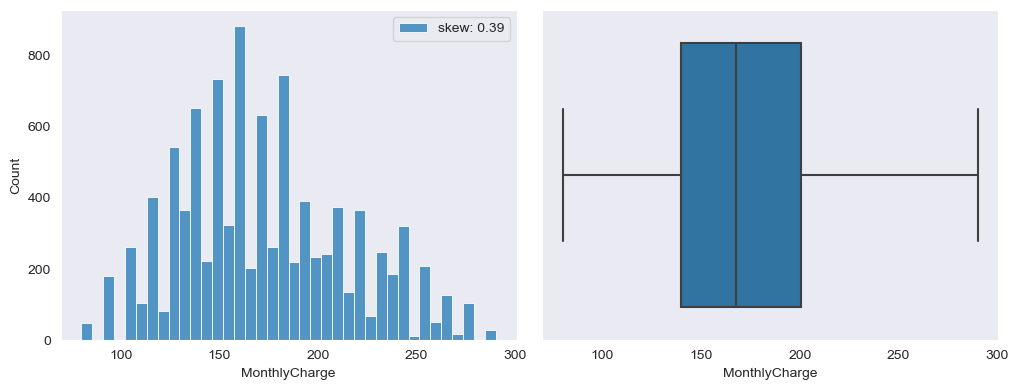

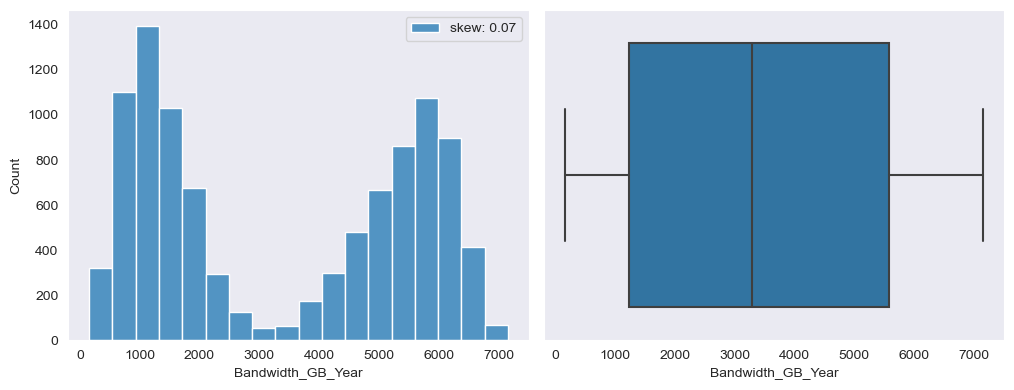

In [86]:
sns.set_style('dark')
for col in CheckOutliers:
    plt.figure(figsize=(15,4))
    plt.subplot(131)
    sns.histplot(df[col], label="skew: " + str(np.round(df[col].skew(),2)))
    plt.legend()
    plt.subplot(132)
    sns.boxplot(df[col])
    plt.tight_layout()
    plt.show()

In [87]:
outliers_new = ['Children', 'Income', 'Outage_sec_perweek','Email', 'Contacts', 'Yearly_equip_failure']
outliers_new 

['Children',
 'Income',
 'Outage_sec_perweek',
 'Email',
 'Contacts',
 'Yearly_equip_failure']

In [88]:
df_cop = df.copy()

In [89]:
def iqr_capping(df, cols, factor):
    
    for col in cols:
        
        q1 = df[col].quantile(0.25)
        q3 = df[col].quantile(0.75)
        
        iqr = q3 - q1
        
        upper_whisker = q3 + (factor*iqr)
        lower_whisker = q1 - (factor*iqr)
        
        df[col] = np.where(df[col]>upper_whisker, upper_whisker,
                  np.where(df[col]<lower_whisker, lower_whisker, df[col]))

In [90]:
iqr_capping(df_cop, outliers_new, 1.5)

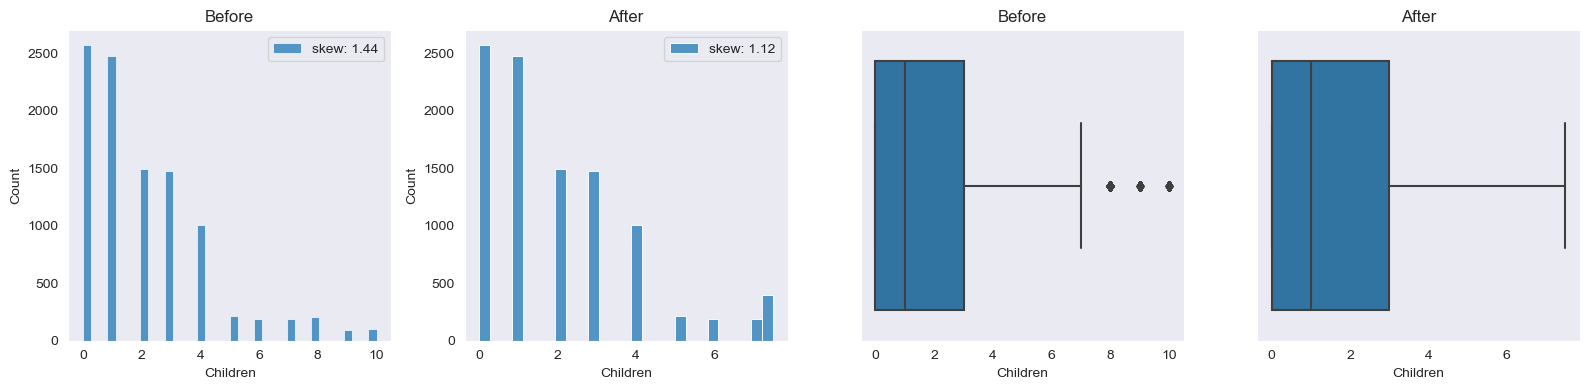

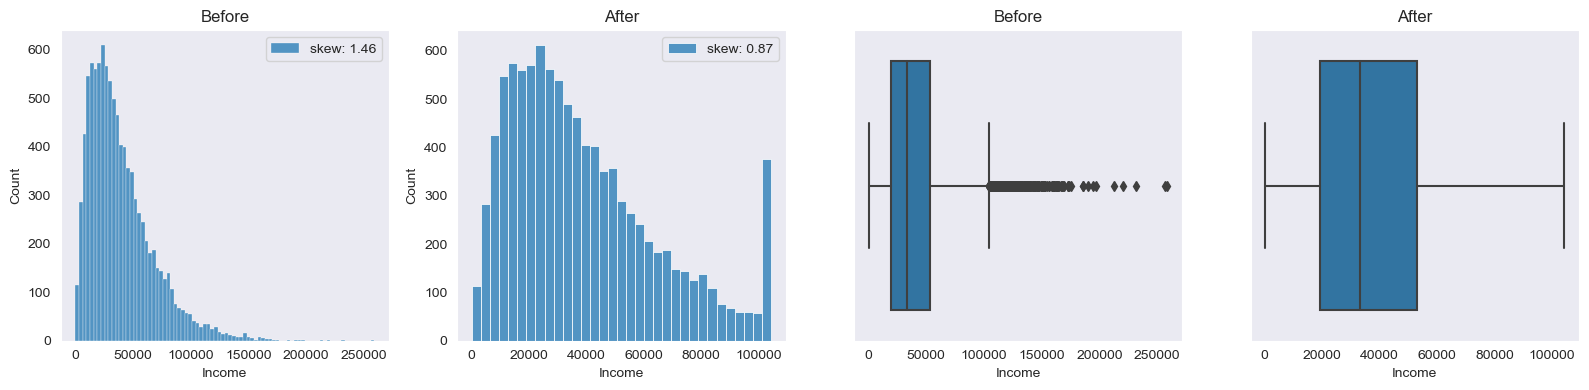

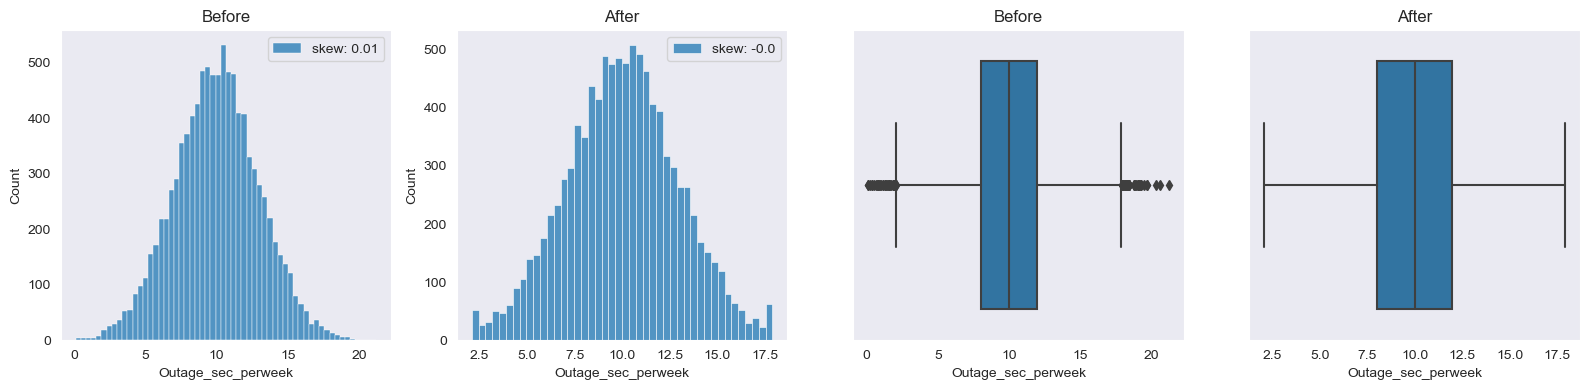

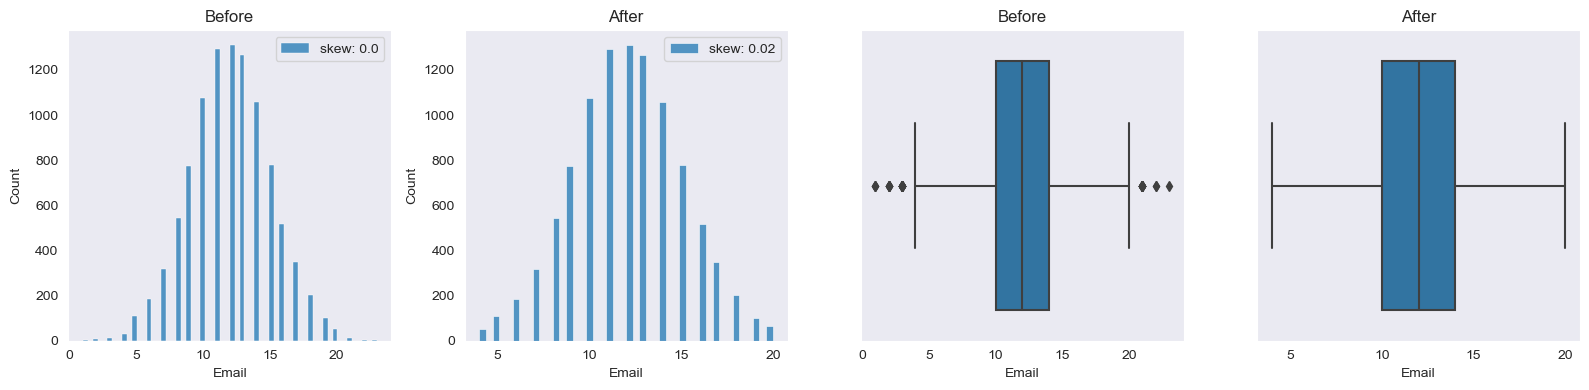

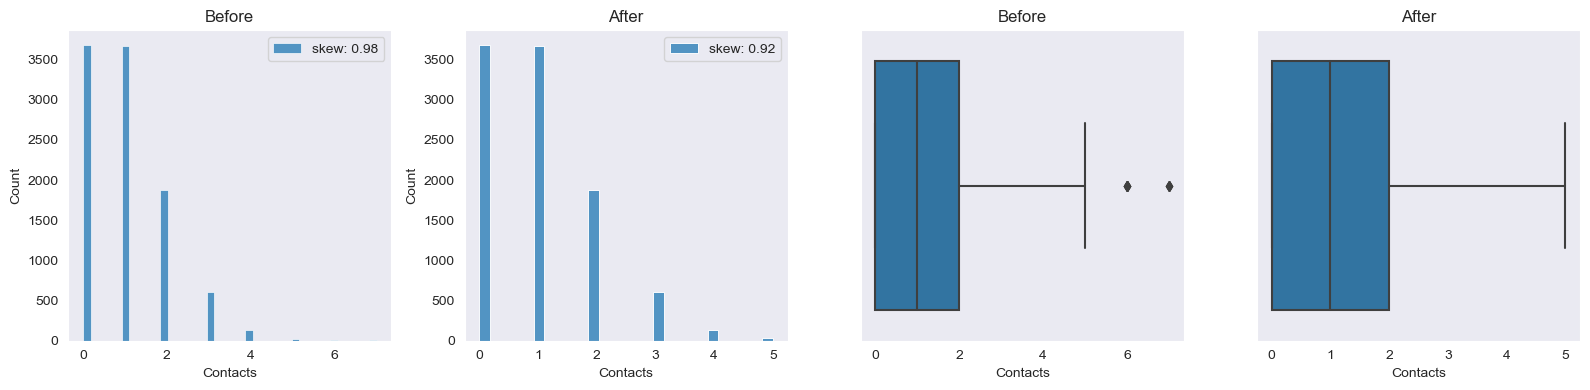

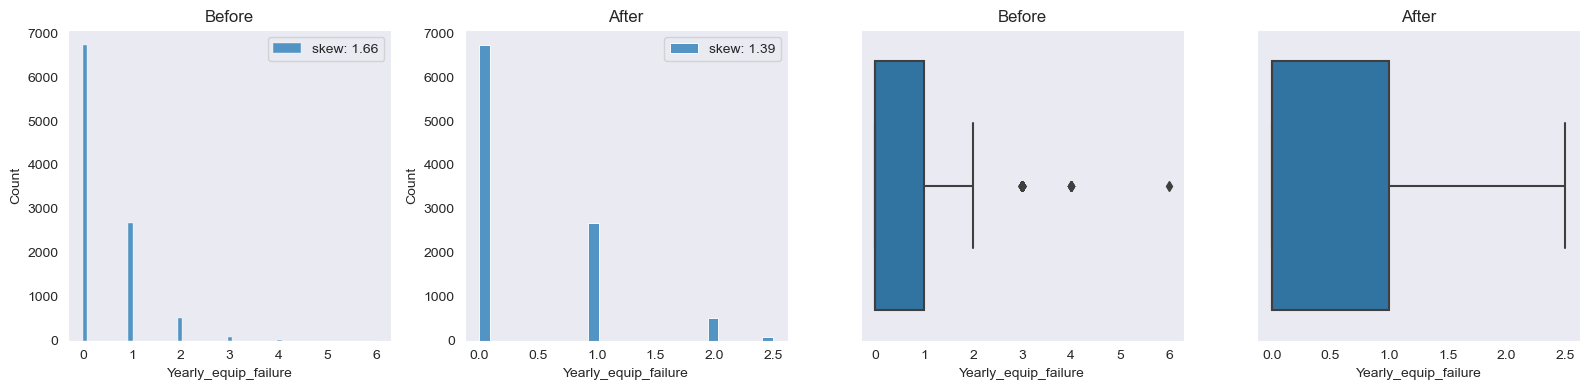

In [91]:
for col in outliers_new:
    plt.figure(figsize=(16,4))
    
    plt.subplot(141)
    sns.histplot(df[col], label="skew: " + str(np.round(df[col].skew(),2)))
    plt.title('Before')
    plt.legend()
    
    plt.subplot(142)
    sns.histplot(df_cop[col], label="skew: " + str(np.round(df_cop[col].skew(),2)))
    plt.title('After')
    plt.legend()
    
    plt.subplot(143)
    sns.boxplot(df[col])
    plt.title('Before')
    
    plt.subplot(144)
    sns.boxplot(df_cop[col])
    plt.title('After')
    plt.tight_layout()
    plt.show()

### Data Exploration - Univariate

In [92]:
df[['Children', 'Age', 'Income', 'Outage_sec_perweek','Email', 'Contacts', 'Yearly_equip_failure', 'Tenure', 'MonthlyCharge', 'Bandwidth_GB_Year']].describe()

Children           Age         Income  Outage_sec_perweek  \
count  10000.0000  10000.000000   10000.000000        10000.000000   
mean       2.0877     53.078400   39806.926771           10.001848   
std        2.1472     20.698882   28199.916702            2.976019   
min        0.0000     18.000000     348.670000            0.099747   
25%        0.0000     35.000000   19224.717500            8.018214   
50%        1.0000     53.000000   33170.605000           10.018560   
75%        3.0000     71.000000   53246.170000           11.969485   
max       10.0000     89.000000  258900.700000           21.207230   

              Email      Contacts  Yearly_equip_failure        Tenure  \
count  10000.000000  10000.000000          10000.000000  10000.000000   
mean      12.016000      0.994200              0.398000     34.526188   
std        3.025898      0.988466              0.635953     26.443063   
min        1.000000      0.000000              0.000000      1.000259   
25%       10.000000      0.000000              0.000000      7.917694   
50%       12.000000      1.000000              0.000000     35.430507   
75%       14.000000      2.000000              1.000000     61.479795   
max       23.000000      7.000000              6.000000     71.999280   

       MonthlyCharge  Bandwidth_GB_Year  
count   10000.000000       10000.000000  
mean      172.624816        3392.341550  
std        42.943094        2185.294852  
min        79.978860         155.506715  
25%       139.979239        1236.470827  
50%       167.484700        3279.536903  
75%       200.734725        5586.141370  
max       290.160419        7158.981530

In [93]:
df[['Techie', 'Churn', 'StreamingMovies', 'StreamingTV', 'TechSupport', 'OnlineBackup', 'OnlineSecurity', 'Port_modem', 'Multiple', 'DeviceProtection']].value_counts()

Techie  Churn  StreamingMovies  StreamingTV  TechSupport  OnlineBackup  OnlineSecurity  Port_modem  Multiple  DeviceProtection
No      No     No               No           No           No            No              Yes         No        No                  80
                                                                                        No          No        No                  72
                                Yes          No           No            No              Yes         No        No                  69
                                                                                        No          Yes       No                  67
                                No           No           Yes           No              Yes         No        No                  66
                                                                                                                                  ..
Yes     No     Yes              No           Yes          Yes           No 

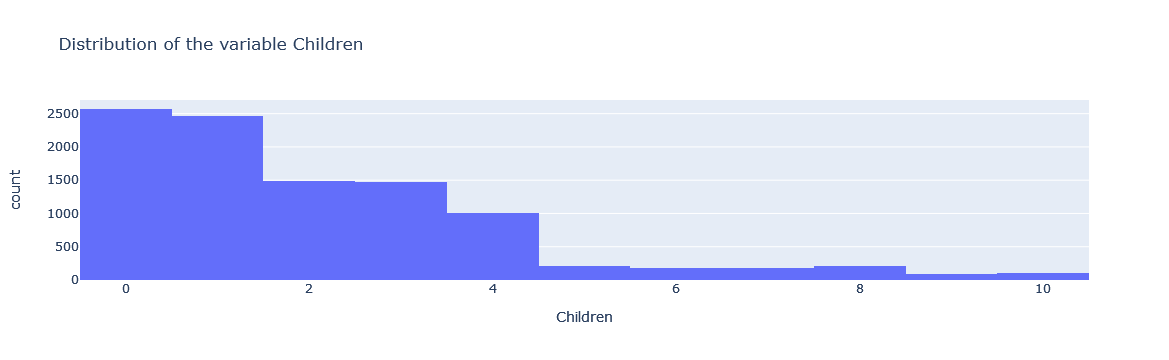

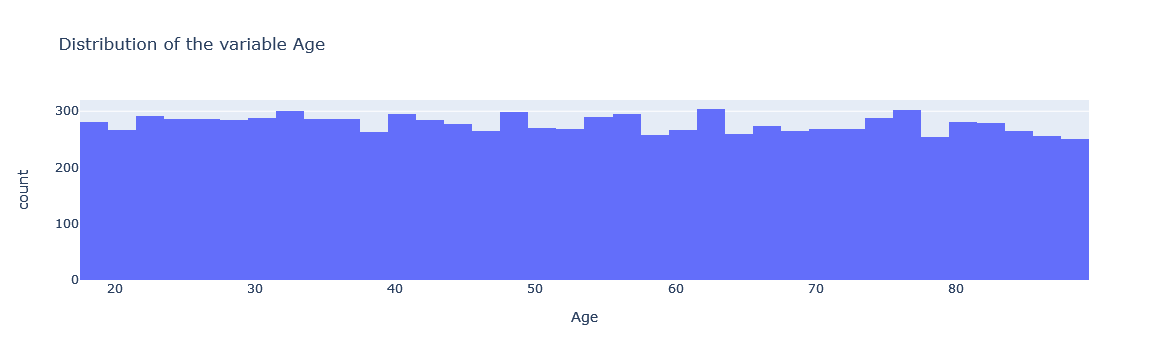

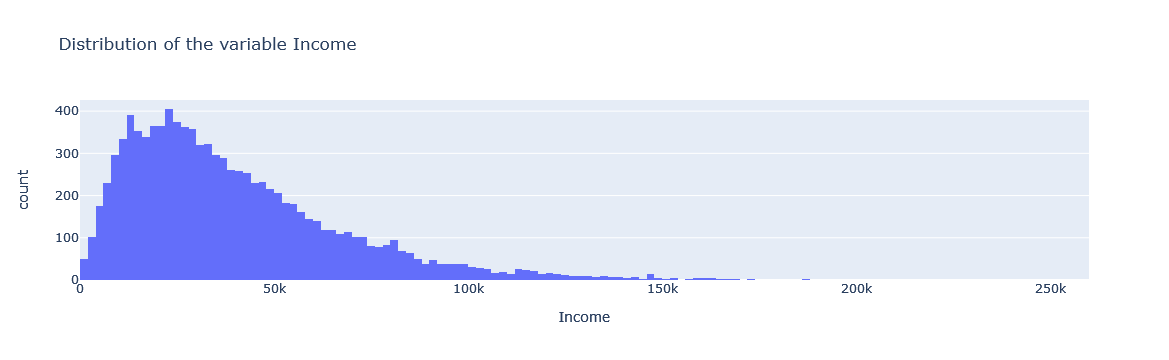

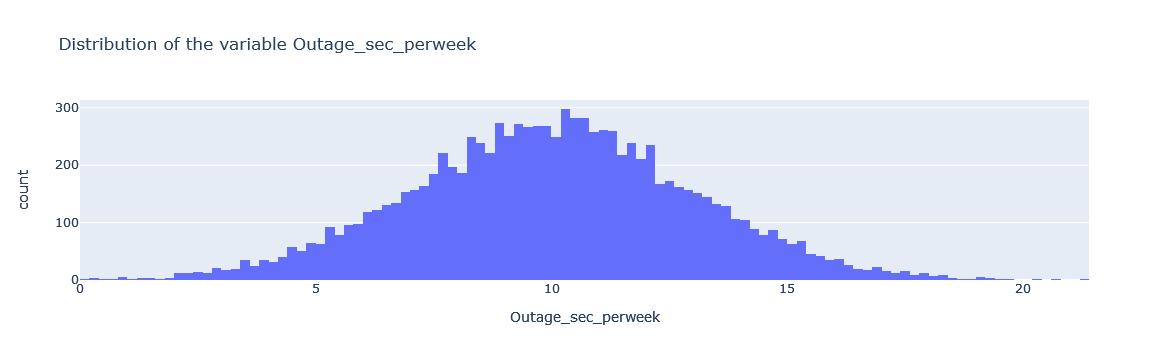

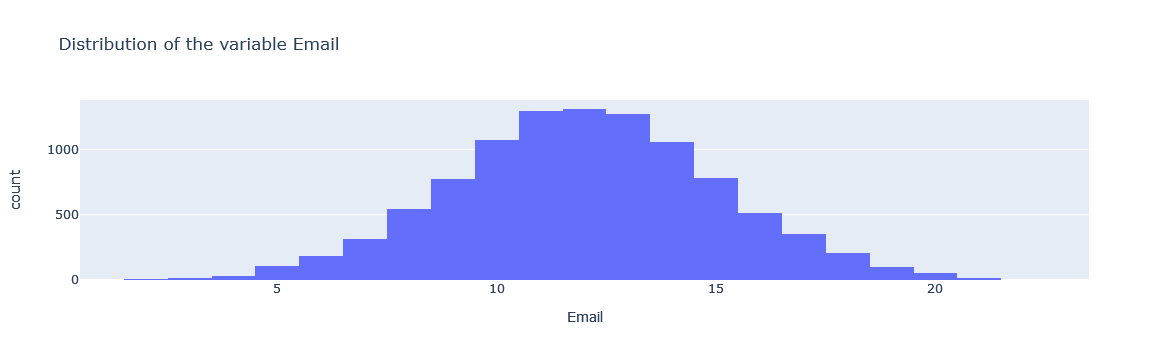

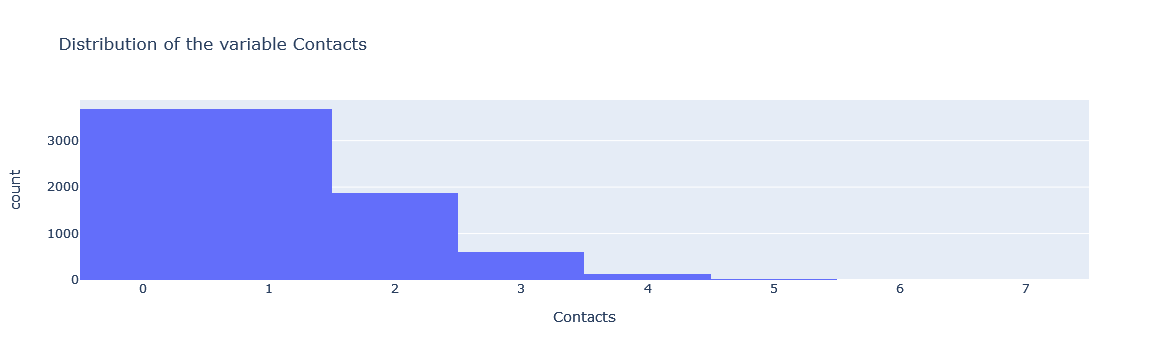

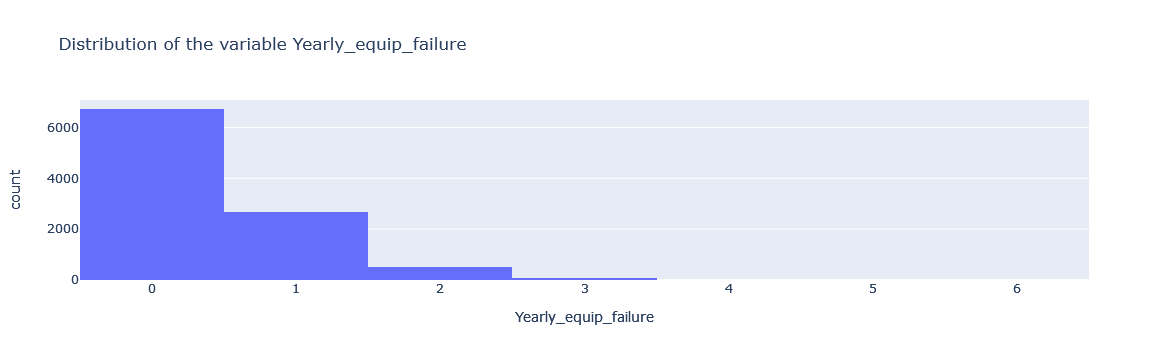

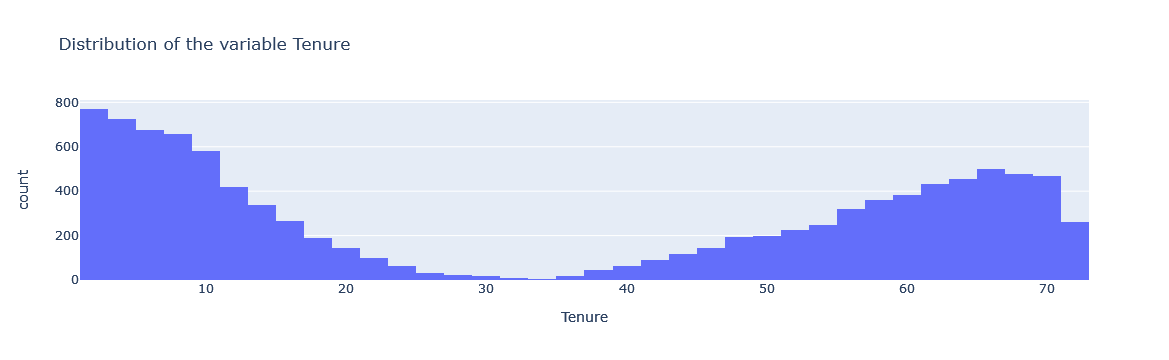

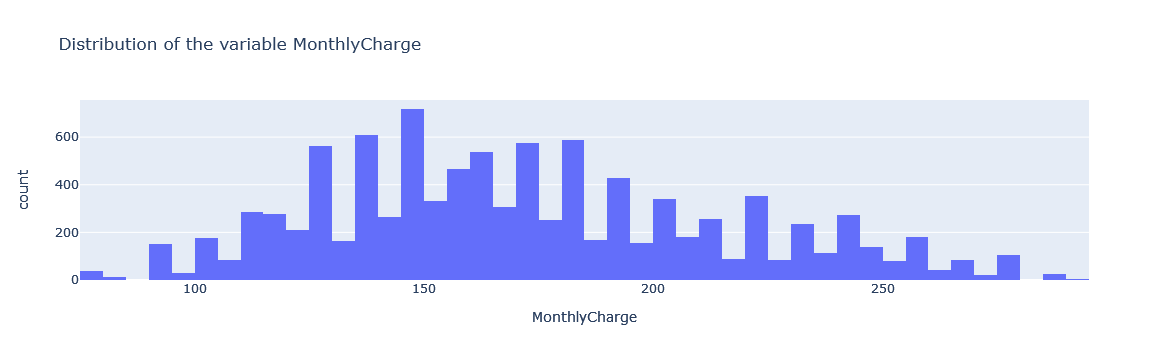

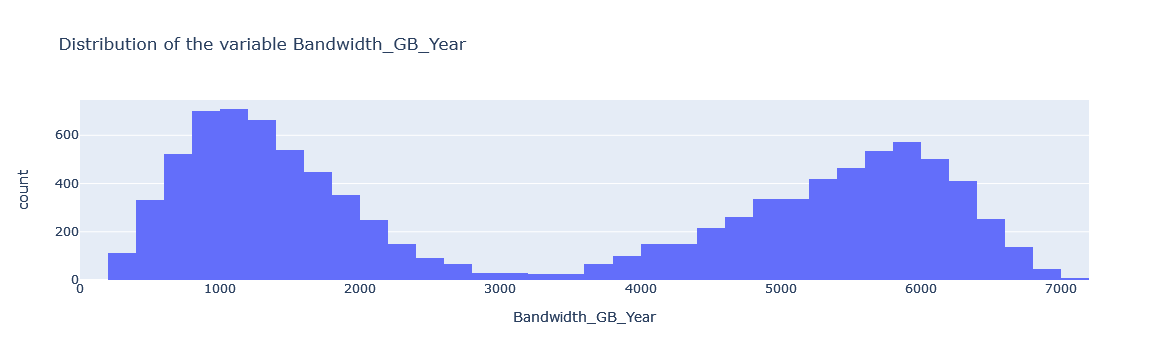

In [94]:
for i in CheckOutliers:
    fig = px.histogram(df, x=i, title=f"Distribution of the variable {i}")
    fig.update_layout( xaxis={'categoryorder':'total descending'})
    fig.show()

In [95]:
categorical= ['Techie', 'Churn', 'StreamingMovies', 'StreamingTV', 'TechSupport', 'OnlineBackup', 'OnlineSecurity', 'Port_modem', 'Multiple', 'DeviceProtection']
categorical

['Techie',
 'Churn',
 'StreamingMovies',
 'StreamingTV',
 'TechSupport',
 'OnlineBackup',
 'OnlineSecurity',
 'Port_modem',
 'Multiple',
 'DeviceProtection']

In [96]:
df_categorical= df[['Techie', 'Churn', 'StreamingMovies', 'StreamingTV', 'TechSupport', 'OnlineBackup', 'OnlineSecurity', 'Port_modem', 'Multiple', 'DeviceProtection']]

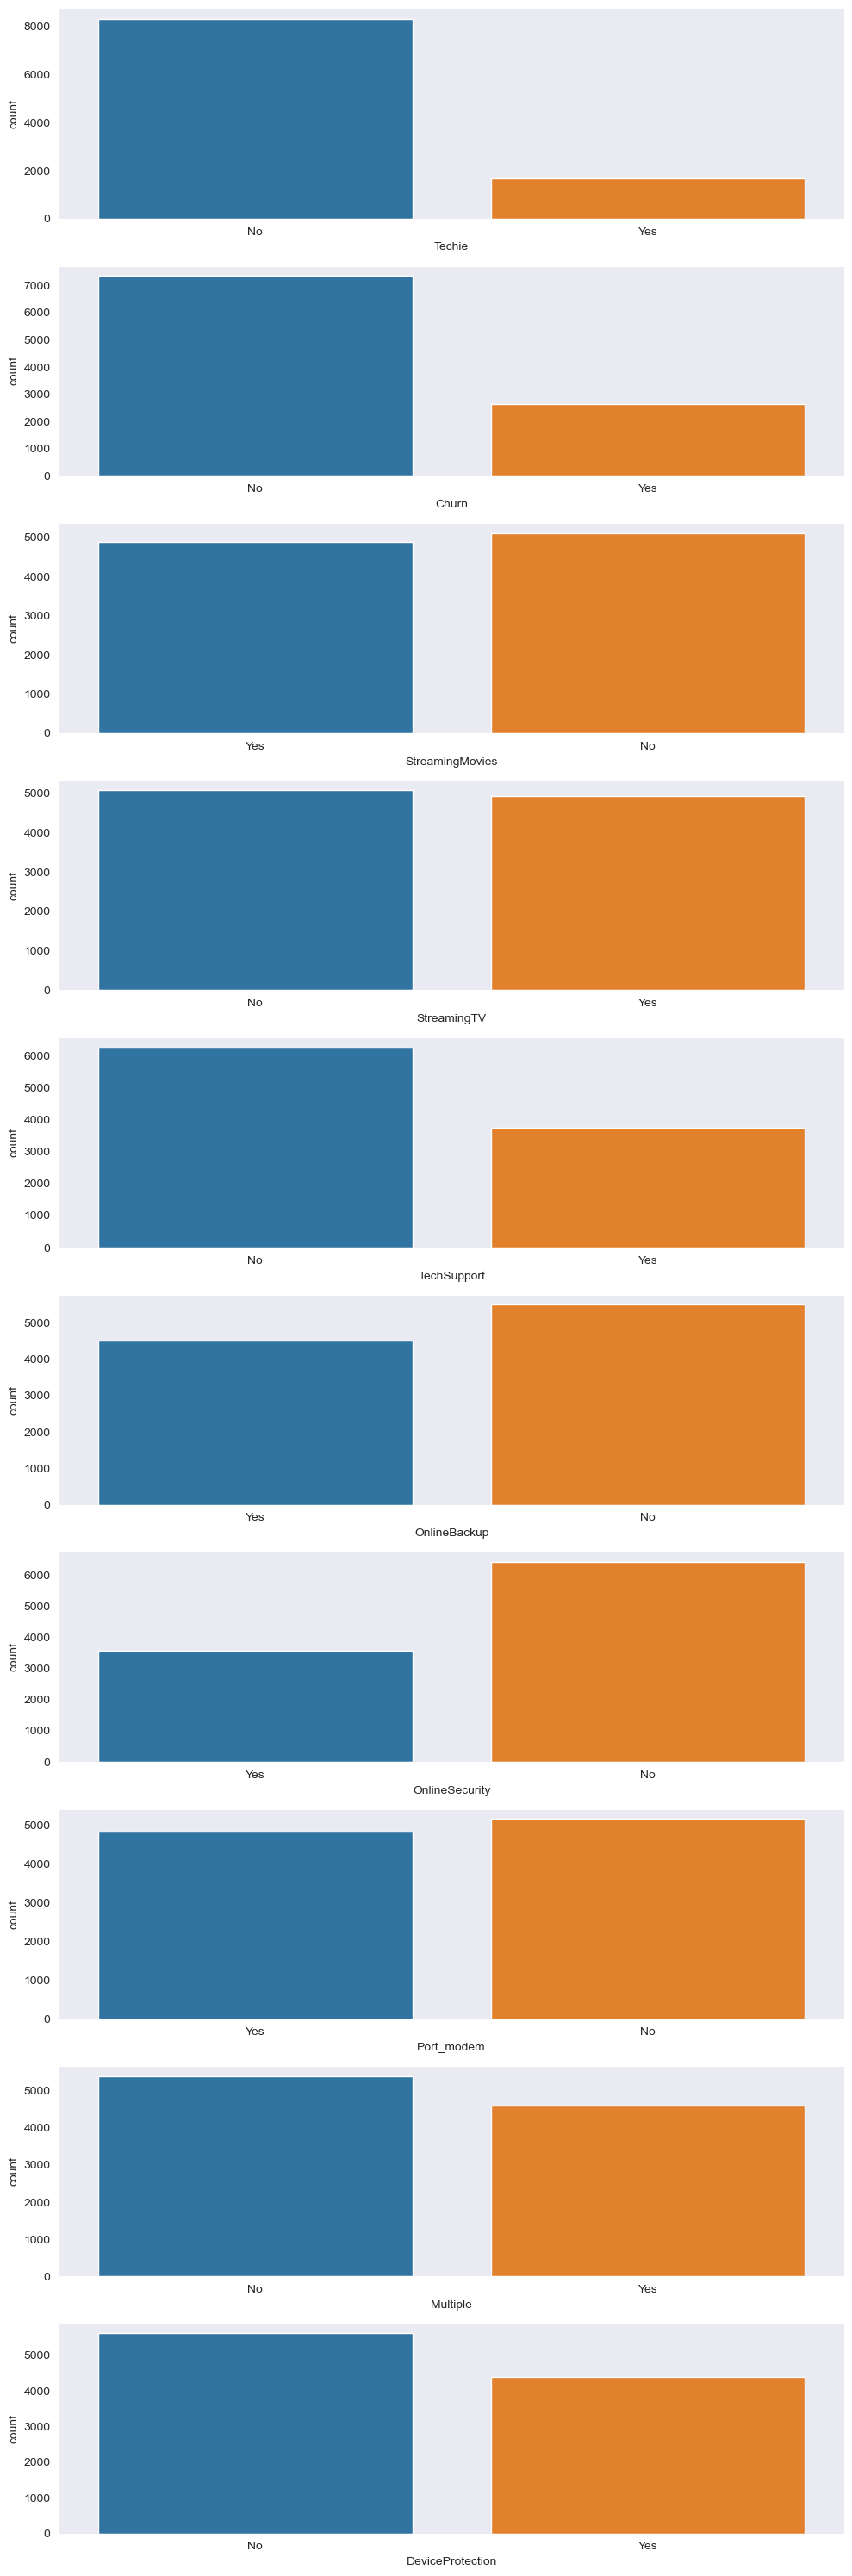

In [97]:
fig , ax = plt.subplots(10,figsize = (10,30))  
for i , subplots in zip (df_categorical, ax.flatten()):  
  sns.countplot(df_categorical[i],ax = subplots)
plt.tight_layout()
plt.show()

### Data Exploration - Bivariate

In [98]:
df[['Children', 'Age', 'Income', 'Outage_sec_perweek','Email', 'Contacts', 'Yearly_equip_failure', 'Tenure', 'MonthlyCharge', 'Bandwidth_GB_Year']].corr()

Children       Age    Income  Outage_sec_perweek  \
Children              1.000000 -0.029732  0.009942            0.001889   
Age                  -0.029732  1.000000 -0.004091           -0.008047   
Income                0.009942 -0.004091  1.000000           -0.010011   
Outage_sec_perweek    0.001889 -0.008047 -0.010011            1.000000   
Email                 0.004479  0.001588 -0.009267            0.003994   
Contacts             -0.020776  0.015068  0.001233            0.015092   
Yearly_equip_failure  0.007321  0.008577  0.005423            0.002909   
Tenure               -0.005091  0.016979  0.002114            0.002932   
MonthlyCharge        -0.009781  0.010729 -0.003014            0.020496   
Bandwidth_GB_Year     0.025585 -0.014724  0.003674            0.004176   

                         Email  Contacts  Yearly_equip_failure    Tenure  \
Children              0.004479 -0.020776              0.007321 -0.005091   
Age                   0.001588  0.015068              0.008577  0.016979   
Income               -0.009267  0.001233              0.005423  0.002114   
Outage_sec_perweek    0.003994  0.015092              0.002909  0.002932   
Email                 1.000000  0.003040             -0.016354 -0.014468   
Contacts              0.003040  1.000000             -0.006032  0.002820   
Yearly_equip_failure -0.016354 -0.006032              1.000000  0.012435   
Tenure               -0.014468  0.002820              0.012435  1.000000   
MonthlyCharge         0.001997  0.004259             -0.007172 -0.003337   
Bandwidth_GB_Year    -0.014579  0.003299              0.012034  0.991495   

                      MonthlyCharge  Bandwidth_GB_Year  
Children                  -0.009781           0.025585  
Age                        0.010729          -0.014724  
Income                    -0.003014           0.003674  
Outage_sec_perweek         0.020496           0.004176  
Email                      0.001997          -0.014579  
Contacts                   0.004259           0.003299  
Yearly_equip_failure      -0.007172           0.012034  
Tenure                    -0.003337           0.991495  
MonthlyCharge              1.000000           0.060406  
Bandwidth_GB_Year          0.060406           1.000000

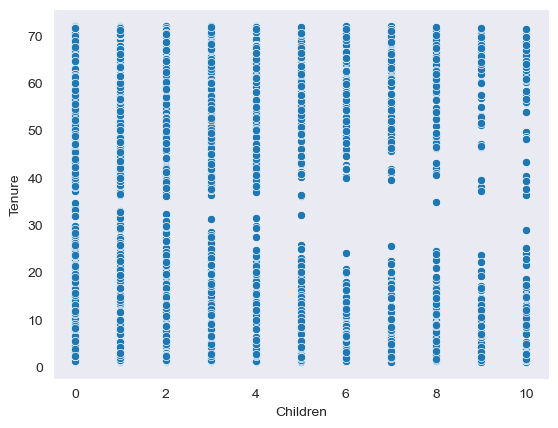

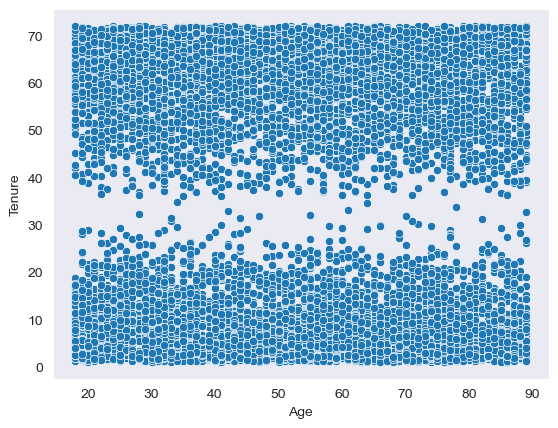

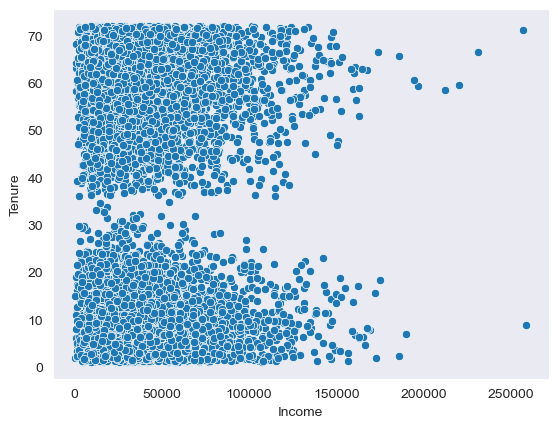

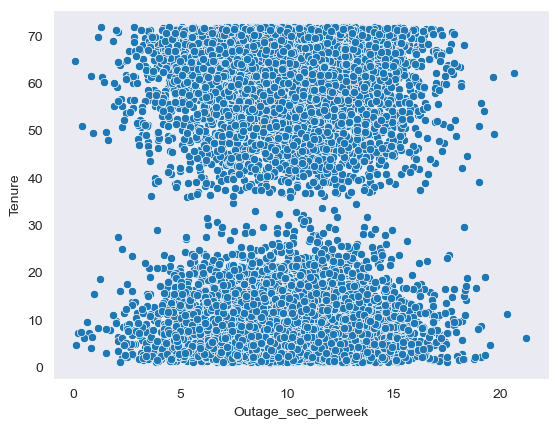

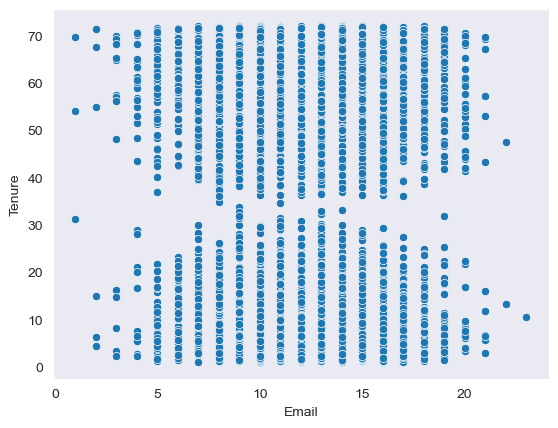

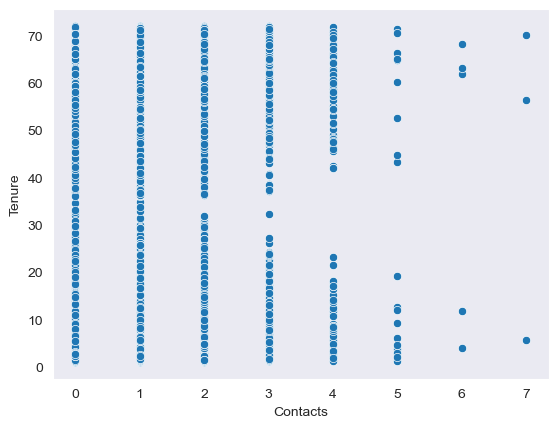

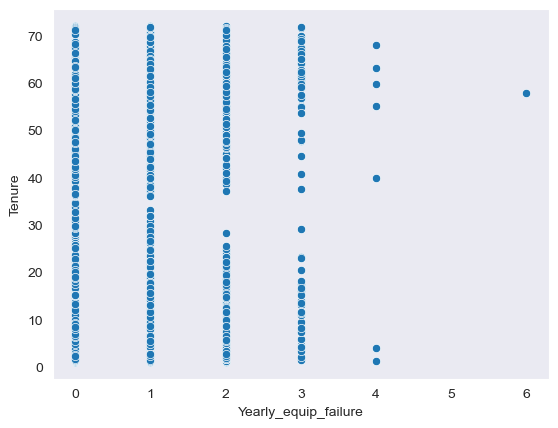

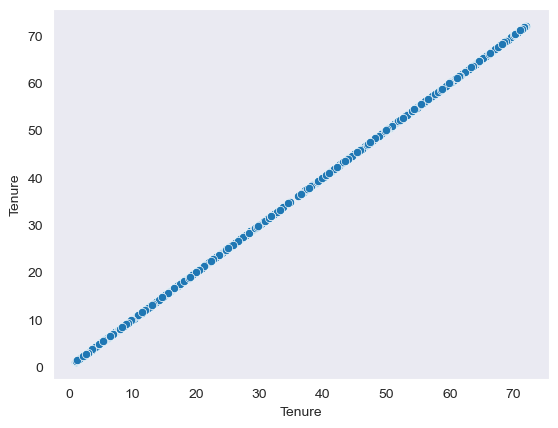

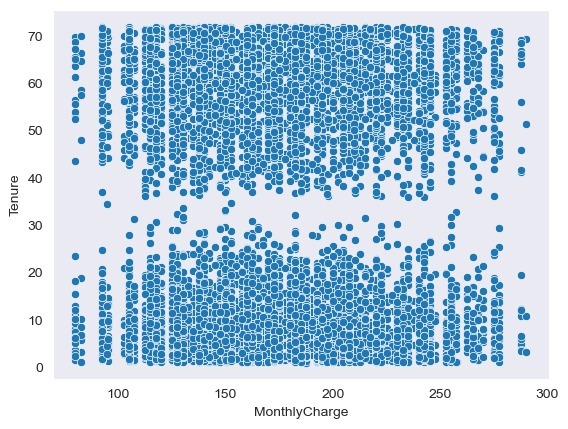

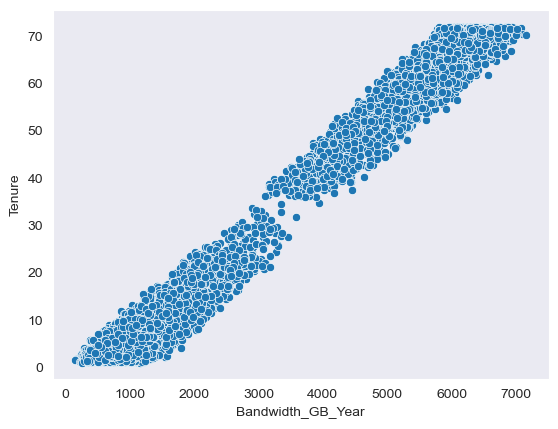

In [99]:
for i in CheckOutliers:
    sns.scatterplot(data=df, x=i, y='Tenure')
    plt.show()

In [100]:
df.groupby(by=categorical).agg('mean')[['Tenure']]

Tenure
Techie Churn StreamingMovies StreamingTV TechSupport OnlineBackup OnlineSecurity Port_modem Multiple DeviceProtection           
No     No    No              No          No          No           No             No         No       No                33.582371
                                                                                                     Yes               30.562214
                                                                                            Yes      No                34.682249
                                                                                                     Yes               32.795980
                                                                                 Yes        No       No                34.652395
...                                                                                                                          ...
Yes    Yes   Yes             Yes         Yes         Yes          Yes            No         Yes      No                27.824480
                                                                                                     Yes               14.141018
                                                                                 Yes        No       Yes                8.432205
                                                                                            Yes      No                 6.760841
                                                                                                     Yes               10.811820

[951 rows x 1 columns]

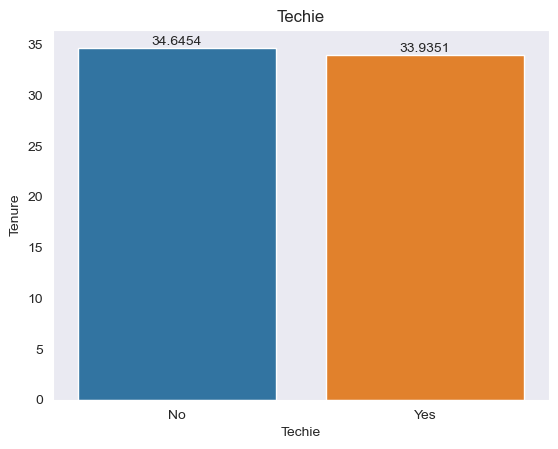

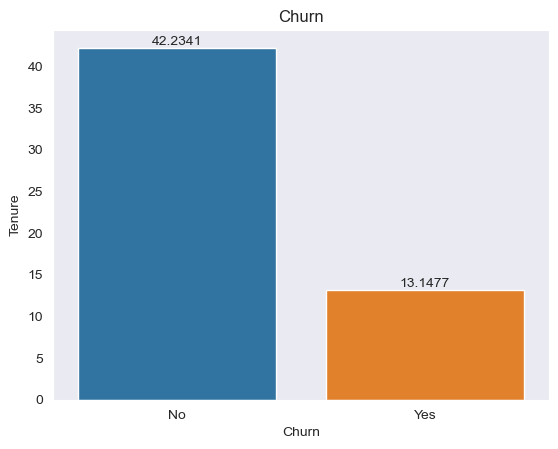

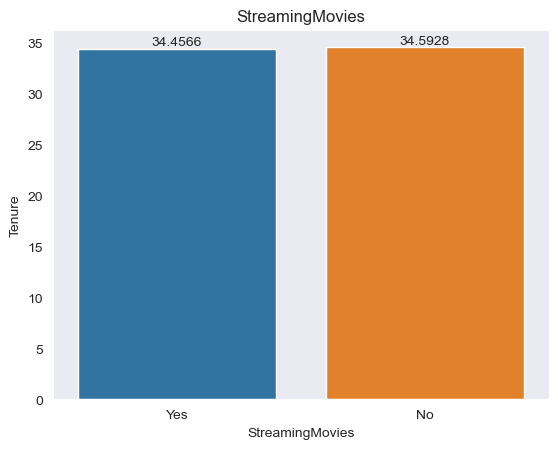

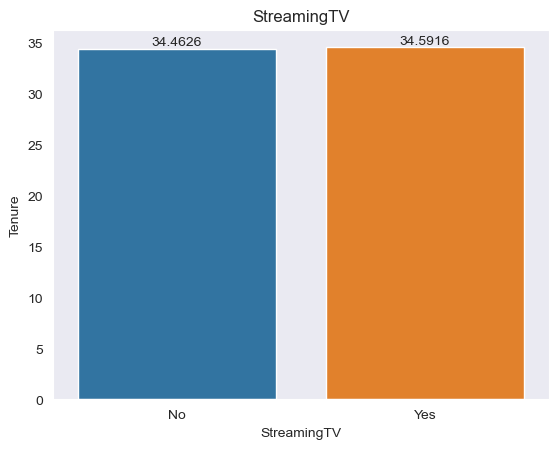

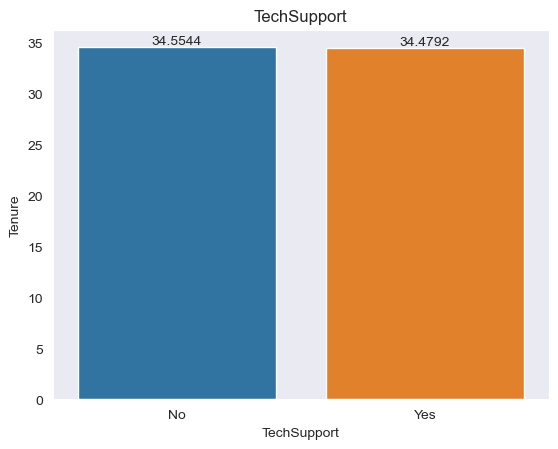

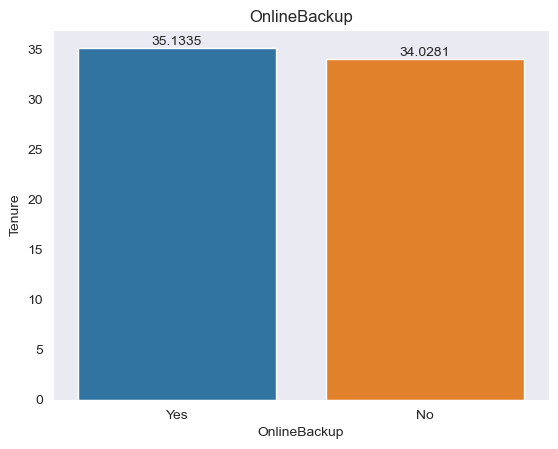

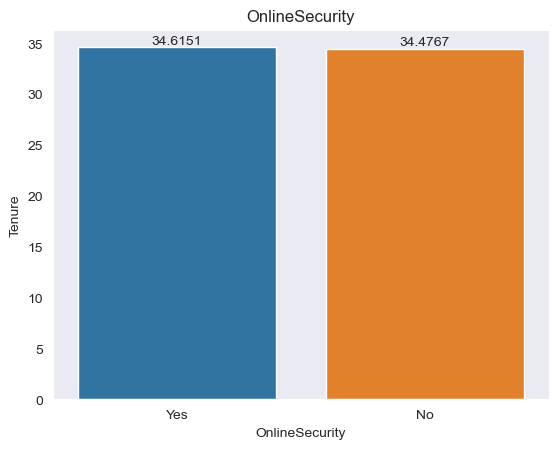

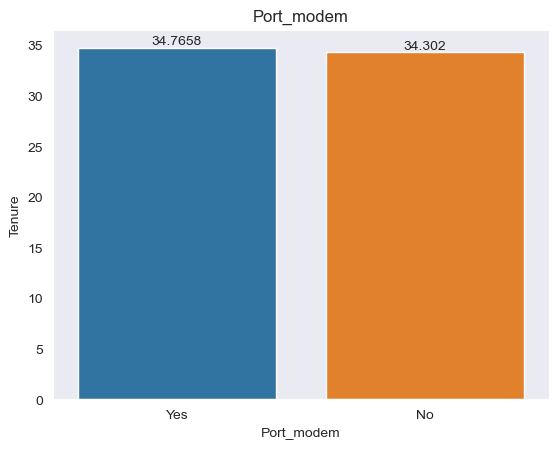

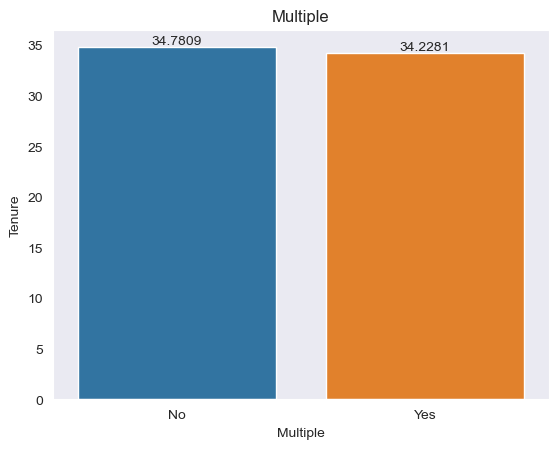

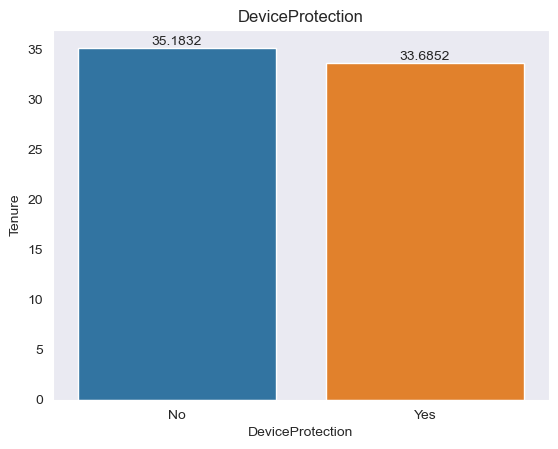

In [101]:
for i in categorical:
    ax = sns.barplot(x=i, y='Tenure', data=df, ci=False) 
    for container in ax.containers:
        ax.bar_label(container)
    plt.title(i)
    plt.show()

### Data Wrangling - Re-expression of Ordinal Categorial Variables

In [102]:
df[['Techie', 'Churn', 'StreamingMovies', 'StreamingTV', 'TechSupport', 'OnlineBackup', 'OnlineSecurity', 'Port_modem', 'Multiple', 'DeviceProtection']].head(10)

Techie Churn StreamingMovies StreamingTV TechSupport OnlineBackup  \
0     No    No             Yes          No          No          Yes   
1    Yes   Yes             Yes         Yes          No           No   
2    Yes    No             Yes          No          No           No   
3    Yes    No              No         Yes          No           No   
4     No   Yes              No         Yes         Yes           No   
5     No    No             Yes          No          No          Yes   
6    Yes   Yes             Yes         Yes         Yes           No   
7    Yes   Yes              No          No          No          Yes   
8     No    No              No          No          No          Yes   
9     No    No             Yes          No          No           No   

  OnlineSecurity Port_modem Multiple DeviceProtection  
0            Yes        Yes       No               No  
1            Yes         No      Yes               No  
2             No        Yes      Yes               No  
3            Yes         No       No               No  
4             No        Yes       No               No  
5            Yes        Yes      Yes              Yes  
6             No         No       No               No  
7             No         No       No               No  
8            Yes        Yes       No               No  
9            Yes        Yes       No              Yes

In [103]:
for col in categorical:
    df[col] = df[col].astype('category')
    df[col] = df[col].cat.codes

In [104]:
df[['Techie', 'Churn', 'StreamingMovies', 'StreamingTV', 'TechSupport', 'OnlineBackup', 'OnlineSecurity', 'Port_modem', 'Multiple', 'DeviceProtection']].head(10)

Techie  Churn  StreamingMovies  StreamingTV  TechSupport  OnlineBackup  \
0       0      0                1            0            0             1   
1       1      1                1            1            0             0   
2       1      0                1            0            0             0   
3       1      0                0            1            0             0   
4       0      1                0            1            1             0   
5       0      0                1            0            0             1   
6       1      1                1            1            1             0   
7       1      1                0            0            0             1   
8       0      0                0            0            0             1   
9       0      0                1            0            0             0   

   OnlineSecurity  Port_modem  Multiple  DeviceProtection  
0               1           1         0                 0  
1               1           0         1                 0  
2               0           1         1                 0  
3               1           0         0                 0  
4               0           1         0                 0  
5               1           1         1                 1  
6               0           0         0                 0  
7               0           0         0                 0  
8               1           1         0                 0  
9               1           1         0                 1

### Initial Model - Multiple Linear Regression

In [105]:
x = df[['Children', 'Age', 'Income', 'Outage_sec_perweek','Email', 'Contacts', 'Yearly_equip_failure', 'MonthlyCharge', 'Bandwidth_GB_Year', 'Techie', 
        'Churn', 'StreamingMovies', 'StreamingTV', 'TechSupport', 'OnlineBackup', 'OnlineSecurity', 'Port_modem', 'Multiple', 'DeviceProtection']]

In [106]:
y = df[['Tenure']]

In [107]:
mrm = linear_model.LinearRegression() 
mrm.fit(x, y) 

print('y-Intercept: \n', mrm.intercept_) 
print('x-Coefficients: \n', mrm.coef_)

x = sm.add_constant(x)

def mrm_models():
    model = sm.OLS(y, x).fit()
    print(model.summary())
    print('F-statistic:', model.fvalue)
mrm_models()

y-Intercept: 
 [-5.99816174]
x-Coefficients: 
 [[-3.66821455e-01  3.98926200e-02 -1.06401899e-06  7.34253303e-03
  -8.96336637e-04 -2.23599388e-02 -1.58406318e-02  3.18050464e-02
   1.19569814e-02  5.74755807e-02 -1.41954320e+00 -3.82921601e+00
  -3.79505153e+00 -5.09209759e-01 -1.74853132e+00 -1.04411811e+00
   3.88259091e-02 -1.80819125e+00 -1.35726422e+00]]
                            OLS Regression Results                            
Dep. Variable:                 Tenure   R-squared:                       0.992
Model:                            OLS   Adj. R-squared:                  0.992
Method:                 Least Squares   F-statistic:                 6.603e+04
Date:                Mon, 13 Feb 2023   Prob (F-statistic):               0.00
Time:                        11:11:35   Log-Likelihood:                -22730.
No. Observations:               10000   AIC:                         4.550e+04
Df Residuals:                    9980   BIC:                         4.564e+04
Df Mo

### Test for Multicollinearity

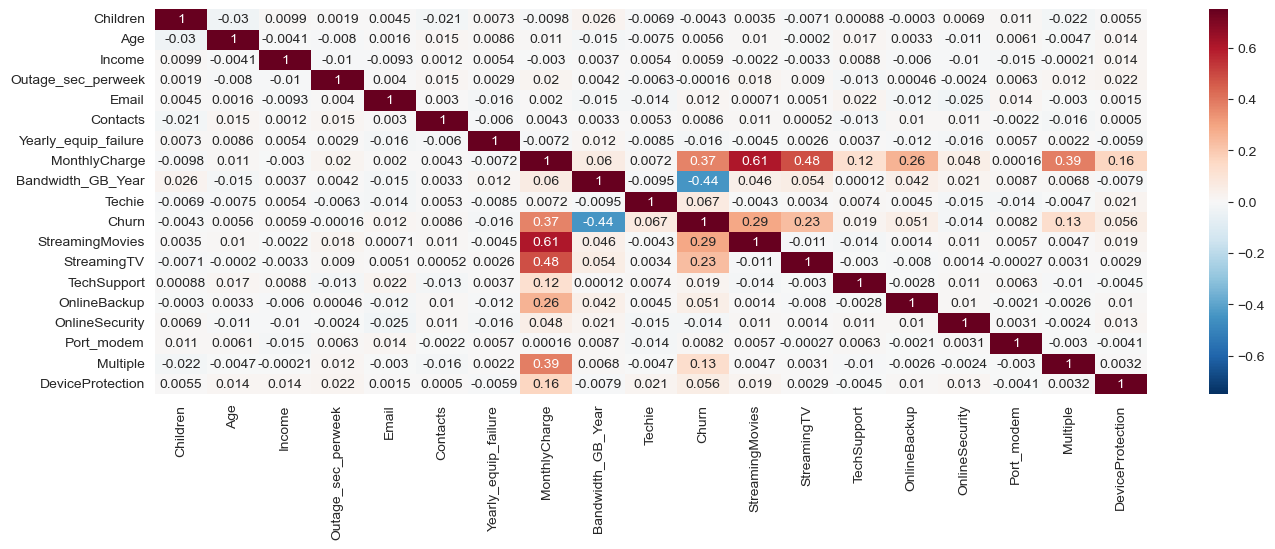

In [108]:
correlation = df[['Children', 'Age', 'Income', 'Outage_sec_perweek','Email', 'Contacts', 'Yearly_equip_failure', 'MonthlyCharge', 'Bandwidth_GB_Year', 'Techie', 'Churn', 
                  'StreamingMovies', 'StreamingTV', 'TechSupport', 'OnlineBackup', 'OnlineSecurity', 'Port_modem', 'Multiple', 'DeviceProtection']].corr()
plt.figure(figsize=(16, 5))
heatmap = sns.heatmap(correlation, annot=True, linewidths=0, vmin=-0.75, vmax=0.75, cmap="RdBu_r")

In [109]:
vif_score = pd.DataFrame() 
vif_score['Features'] = x.columns

vif_score['VIF'] = [variance_inflation_factor(x.values, i) 
for i in range(len(x.columns))] 
print(vif_score)

                Features        VIF
0                  const  80.282706
1               Children   1.003184
2                    Age   1.002426
3                 Income   1.001181
4     Outage_sec_perweek   1.001833
5                  Email   1.002382
6               Contacts   1.001906
7   Yearly_equip_failure   1.001387
8          MonthlyCharge   7.388216
9      Bandwidth_GB_Year   1.374616
10                Techie   1.007998
11                 Churn   1.634312
12       StreamingMovies   3.884442
13           StreamingTV   2.868056
14           TechSupport   1.136946
15          OnlineBackup   1.516282
16        OnlineSecurity   1.012052
17            Port_modem   1.001297
18              Multiple   2.108886
19      DeviceProtection   1.161009


### Reduced Model - Feature (Variable) Selection Method - Backward Stepwise Elimination

In [110]:
mrm_models()

                            OLS Regression Results                            
Dep. Variable:                 Tenure   R-squared:                       0.992
Model:                            OLS   Adj. R-squared:                  0.992
Method:                 Least Squares   F-statistic:                 6.603e+04
Date:                Mon, 13 Feb 2023   Prob (F-statistic):               0.00
Time:                        11:13:37   Log-Likelihood:                -22730.
No. Observations:               10000   AIC:                         4.550e+04
Df Residuals:                    9980   BIC:                         4.564e+04
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -5.9982 

In [111]:
x.drop('Email',axis=1, inplace=True)
mrm_models()

                            OLS Regression Results                            
Dep. Variable:                 Tenure   R-squared:                       0.992
Model:                            OLS   Adj. R-squared:                  0.992
Method:                 Least Squares   F-statistic:                 6.970e+04
Date:                Mon, 13 Feb 2023   Prob (F-statistic):               0.00
Time:                        11:14:28   Log-Likelihood:                -22730.
No. Observations:               10000   AIC:                         4.550e+04
Df Residuals:                    9981   BIC:                         4.563e+04
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -6.0089 

In [112]:
x.drop('Yearly_equip_failure',axis=1, inplace=True)
mrm_models()

                            OLS Regression Results                            
Dep. Variable:                 Tenure   R-squared:                       0.992
Model:                            OLS   Adj. R-squared:                  0.992
Method:                 Least Squares   F-statistic:                 7.381e+04
Date:                Mon, 13 Feb 2023   Prob (F-statistic):               0.00
Time:                        11:14:36   Log-Likelihood:                -22730.
No. Observations:               10000   AIC:                         4.550e+04
Df Residuals:                    9982   BIC:                         4.563e+04
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -6.0153      0

In [113]:
x.drop('Port_modem',axis=1, inplace=True)
mrm_models()

                            OLS Regression Results                            
Dep. Variable:                 Tenure   R-squared:                       0.992
Model:                            OLS   Adj. R-squared:                  0.992
Method:                 Least Squares   F-statistic:                 7.842e+04
Date:                Mon, 13 Feb 2023   Prob (F-statistic):               0.00
Time:                        11:14:42   Log-Likelihood:                -22730.
No. Observations:               10000   AIC:                         4.549e+04
Df Residuals:                    9983   BIC:                         4.562e+04
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -5.9969      0

In [114]:
x.drop('Techie',axis=1, inplace=True)
mrm_models()

                            OLS Regression Results                            
Dep. Variable:                 Tenure   R-squared:                       0.992
Model:                            OLS   Adj. R-squared:                  0.992
Method:                 Least Squares   F-statistic:                 8.365e+04
Date:                Mon, 13 Feb 2023   Prob (F-statistic):               0.00
Time:                        11:14:49   Log-Likelihood:                -22731.
No. Observations:               10000   AIC:                         4.549e+04
Df Residuals:                    9984   BIC:                         4.561e+04
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -5.9891      0

In [115]:
x.drop('Outage_sec_perweek',axis=1, inplace=True)
mrm_models()

                            OLS Regression Results                            
Dep. Variable:                 Tenure   R-squared:                       0.992
Model:                            OLS   Adj. R-squared:                  0.992
Method:                 Least Squares   F-statistic:                 8.963e+04
Date:                Mon, 13 Feb 2023   Prob (F-statistic):               0.00
Time:                        11:14:56   Log-Likelihood:                -22731.
No. Observations:               10000   AIC:                         4.549e+04
Df Residuals:                    9985   BIC:                         4.560e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -5.9160      0.16

In [116]:
x.drop('Contacts',axis=1, inplace=True)
mrm_models()

                            OLS Regression Results                            
Dep. Variable:                 Tenure   R-squared:                       0.992
Model:                            OLS   Adj. R-squared:                  0.992
Method:                 Least Squares   F-statistic:                 9.652e+04
Date:                Mon, 13 Feb 2023   Prob (F-statistic):               0.00
Time:                        11:15:01   Log-Likelihood:                -22731.
No. Observations:               10000   AIC:                         4.549e+04
Df Residuals:                    9986   BIC:                         4.559e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -5.9364      0.16

In [117]:
x.drop('Income',axis=1, inplace=True)
mrm_models()

                            OLS Regression Results                            
Dep. Variable:                 Tenure   R-squared:                       0.992
Model:                            OLS   Adj. R-squared:                  0.992
Method:                 Least Squares   F-statistic:                 1.046e+05
Date:                Mon, 13 Feb 2023   Prob (F-statistic):               0.00
Time:                        11:15:06   Log-Likelihood:                -22732.
No. Observations:               10000   AIC:                         4.549e+04
Df Residuals:                    9987   BIC:                         4.558e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -5.9797      0.16

### Residual Plots

In [118]:
df['Residual']= model.resid  

In [119]:
df[['Residual']].head(10)

Residual
0  0.360152
1  0.952722
2 -2.933987
3 -3.409212
4  2.085388
5  2.283910
6 -3.635788
7 -2.473746
8 -3.552121
9  1.325031

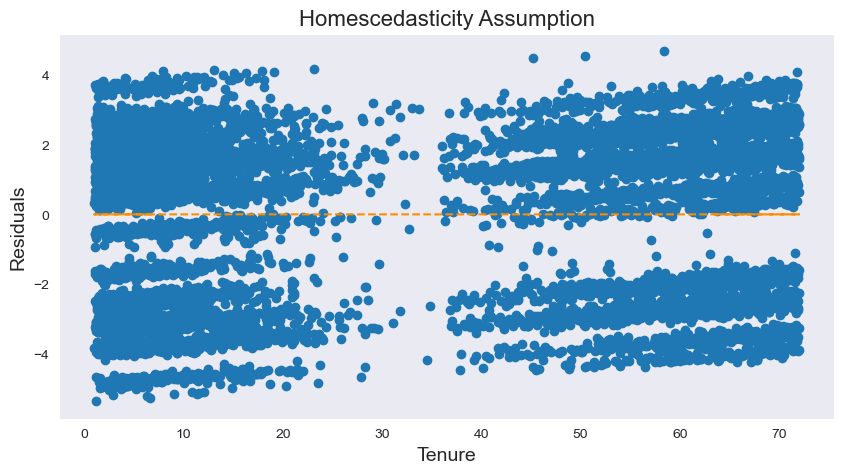

In [120]:
plt.subplots(figsize=(10, 5))
plt.scatter(x=df.Tenure, y=df.Residual)
plt.plot(df.Tenure, [0]*len(df.Tenure), color='darkorange', linestyle='--')

plt.ylabel('Residuals', fontsize=14)
plt.xlabel('Tenure', fontsize=14)
plt.title('Homescedasticity Assumption', fontsize=16)
plt.show()  

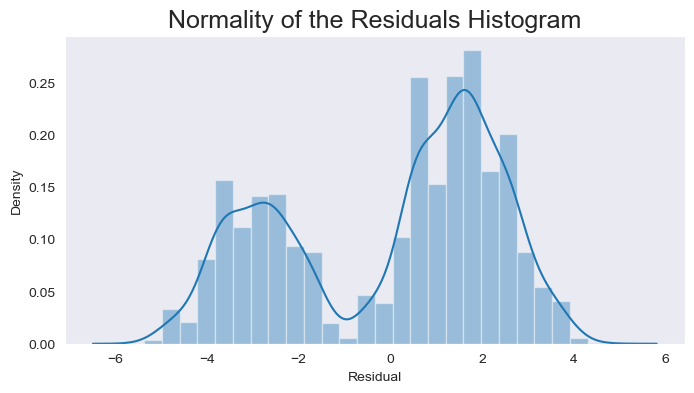

In [121]:
plt.subplots(figsize=(8, 4))
plt.title('Normality of the Residuals Histogram', fontsize=18)
sns.distplot(df['Residual'])
plt.show()

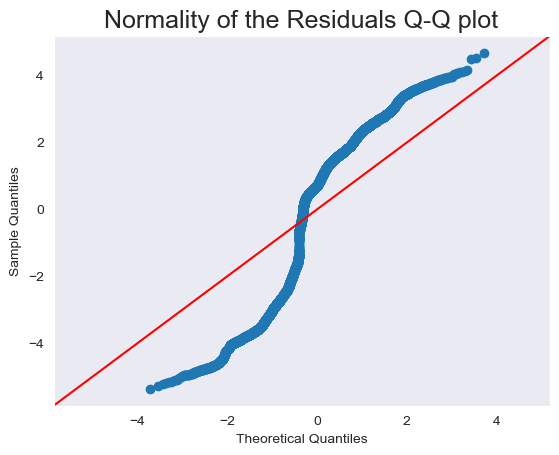

In [122]:
sm.qqplot(df['Residual'],  line='45')
plt.title('Normality of the Residuals Q-Q plot', fontsize=18)
plt.show()

In [123]:
# Residual Standard Error 
print(np.sqrt(model.mse_resid))

2.3514479693355224


In [124]:
print(np.sqrt(model.scale))

2.3514479693355224
